## Intro To Recursion and Memoization
Memoization is keeping the results of expensive calculations and returning the cached result rather than continuously recalculating it.

### Find the nth number in the Fibonacci series. Fibonacci series is as follows:1,1,2,3,5,8,13,21...,

In [30]:
# recursion
def fibonacci(n):
    if n==1 or n==2 :
        return 1
    return fibonacci(n-1) + fibonacci(n-2)

# Memoization
def fibonacci_memo(n):
    if n==1 or n==2:
        return 1
    if n in hashmap:
        return hashmap[n]
    result = fibonacci_memo(n-1) + fibonacci_memo(n-2)
    hashmap[n] = result
    return result

hashmap = dict()
fibonacci_memo(5)
hashmap


{3: 2, 4: 3, 5: 5}

### Power Function: Implement a function to calculate x^n. You may assume that both x and n are positive and overflow doesn't happen. Try doing it in O(log(n)) time.

In [3]:
class Solution:
    def myPow(self, x: float, n: int) -> float:
        if n==0:
            return 1
        if n<0:
            n = -n
            x = 1/x
        self.cache = {}
        return self.helper(x, n)
    
    def helper(self, x, n):
        if n in self.cache:
            return self.cache[n]
        if n == 1:
            return x
        temp = self.helper(x, n//2)
        if n%2 == 0:
            self.cache[n] = temp*temp
        else:
            self.cache[n] = x*temp*temp
        return self.cache[n]
obj = Solution()
obj.myPow(12,2)

144

## Permutation and Combination Using Auxillary Buffer

### Given an array of integers, print all combinations of size X.

In [1]:
def print_combos(a,x):
    if len(a)==0 or a is None or x>len(a):
        return -1
    
    print_combos_helper(a,[],0,x)
    
    
def print_combos_helper(a,buffer, start_index,x):
    if x == len(buffer):
        result.append(buffer[:])
        return
    
    for i in range(start_index,len(a)):
        buffer.append(a[i])
        print_combos_helper(a,buffer, i+1, x)
        buffer.pop()

result = []
print_combos([1,2,3],2)
result

[[1, 2], [1, 3], [2, 3]]

### Maximum Score Words Formed by Letters
Given a list of words, list of  single letters (might be repeating) and score of every character.

Return the maximum score of any valid set of words formed by using the given letters (words[i] cannot be used two or more times).

It is not necessary to use all characters in letters and each letter can only be used once. Score of letters 'a', 'b', 'c', ... ,'z' is given by score[0], score[1], ... , score[25] respectively.

In [11]:
import collections
class Solution:
    def maxScoreWords(self, words, letters, score):
        self.ans = 0
        self.letter_count = collections.Counter(letters)
        self.score = score
        self.generate_subsets(words, [])
        return self.ans
    
    def generate_subsets(self, words, buffer):
        self.update_score(buffer[:])
        if not words:
            return
        for i in range(len(words)):
            buffer.append(words[i])
            self.generate_subsets(words[i+1:], buffer)
            buffer.pop()
            
    def update_score(self, buffer):
        string = ''.join(buffer)
        freq = collections.Counter(string)
        score = 0
        for letter in string:
            if freq[letter] <= self.letter_count[letter]:
                score += self.score[ord(letter) - ord('a')]
            else: return
        self.ans = max(self.ans, score)
    
words = ["dog","cat","dad","good"] 
letters = ["a","a","c","d","d","d","g","o","o"]
score = [1,0,9,5,0,0,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0]
obj = Solution()
obj.maxScoreWords(words, letters, score)

23

### Phone Number Mnemonic Problem: Given an N digit phone number, print all the strings that can be made from that phone number.
Since 1 and 0 don't correspond to any characters, ignore them. For example:

* 213 => AD, AE, AF, BD, BE, BF, CD, CE, CF 

* 456 => GJM, GJN, GJO, GKM, GKN, GKO,.. etc.

In [4]:
def print_words(a):
    if len(a)==0:
        return ''
    print_words_helper(a, [], 0)

def print_words_helper(a,buffer,a_next):
    
    get_letter = {'0' : '',
                  '1' : '',
                  '2' : 'abc',
                  '3' : 'def',
                  '4' : 'ghi',
                  '5' : 'jkl',
                  '6' : 'mno',
                  '7' : 'pqrs',
                  '8' : 'tuv',
                  '9' : 'wxyz'}
    
    if len(a)==len(buffer) or a_next == len(a):
        string = ''.join(buffer)
        result.append(string)
        return
    
    letters = get_letter[a[a_next]]
    if len(letters) == 0:
        print_words_helper(a,buffer, a_next+1)
        
    for letter in letters:
        buffer.append(letter)
        print_words_helper(a,buffer,a_next+1)
        buffer.pop()
    
result = []
print_words('14')

result

['g', 'h', 'i']

### Decode
A message containing letters from A-Z is being encoded to numbers using the following mapping:

* 'A' -> 1
* 'B' -> 2
...
* 'Z' -> 26
Given a non-empty string containing only digits, determine the total number of ways to decode it.

Example 1:

* Input: "12"
* Output: ['AB', 'L']
* Explanation: It could be decoded as "AB" (1 2) or "L" (12).

Example 2:

* Input: "226"
* Output: ['BZ', 'VF', 'BBF']
* Explanation: It could be decoded as "BZ" (2 26), "VF" (22 6), or "BBF" (2 2 6).

In [32]:
class Solution:
    
    def decode(self, s):
        import string
        self.mapping = {}
        for i, char in enumerate(string.ascii_uppercase):
            self.mapping[i+1] = char
        self.ans = []
        self.helper([], 0, s)
        return self.ans
    
    def helper(self, buffer, pointer, s):
        if pointer == len(s):
            self.ans.append(''.join(buffer))
            return
        
        if pointer+1 <= len(s):
            sub1 = s[pointer:pointer+1]
            if sub1[0]!='0' and 1<=int(sub1)<=26:
                letter = self.mapping[int(sub1)]
                buffer.append(letter)
                self.helper(buffer, pointer+1,s)
                buffer.pop()
        
        if pointer+2 <= len(s):
            sub2 = s[pointer:pointer+2]
            if sub2[0]!='0' and 1<=int(sub2)<=26:
                letter = self.mapping[int(sub2)]
                buffer.append(letter)
                self.helper(buffer, pointer+2,s)
                buffer.pop()
            

sol = Solution()
sol.decode('2022')

['TBB', 'TV']

### Print all subsets of an array

In [3]:
def print_subsets(a):
    if len(a)==0 or a is None:
        return -1
    
    print_subsets_helper(a,[],0)
    
    
def print_subsets_helper(a,buffer, start_index):
    result.append(buffer[:])
    if len(buffer) == len(a):
        return 

    for i in range(start_index,len(a)):
        buffer.append(a[i])
        print_subsets_helper(a,buffer, i+1)
        buffer.pop()

result = []
print_subsets([1,4,2]) 
result

[[], [1], [1, 4], [1, 4, 2], [1, 2], [4], [4, 2], [2]]

### Print all subsets when array contains duplicates

In [18]:
def print_subsets(a):
    if len(a)==0 or a is None:
        return -1
    a.sort()
    print_subsets_helper(a,[],0)
    
    
def print_subsets_helper(a,buffer, start_index):
    result.append(buffer[:])
    if len(buffer) == len(a):
        return 

    for i in range(start_index,len(a)):
        if i > start_index and a[i] == a[i-1]:
            continue
        buffer.append(a[i])
        print_subsets_helper(a,buffer, i+1)
        buffer.pop()

result = []
print_subsets([1,4,4]) 
result

[[], [1], [1, 4], [1, 4, 4], [4], [4, 4]]

### Print all permutations of an array of size x

In [23]:
def permutations(a,x):
    if len(a)==0 or a is None or x==0:
        return []
    
    permutations_helper(a,[],set(),x)

def permutations_helper(a,buffer,in_buffer,x):
    
    if x==len(buffer):
        result.append(buffer[:])
        return
    
    for i in range(0,len(a)):
        if a[i] not in in_buffer:
            in_buffer.add(a[i])
            buffer.append(a[i])
            permutations_helper(a,buffer,in_buffer,x)
            buffer.pop()
            in_buffer.remove(a[i])
    
result = []
permutations([1,2,3],2)
result

[[1, 2], [1, 3], [2, 1], [2, 3], [3, 1], [3, 2]]

### Print all permutations when array contains duplicates

In [8]:
class Solution:
    def permuteUnique(self, a):
        from collections import Counter
        self.result = []
        return self.permute_helper(a,[], Counter(a))
    
    def permute_helper(self,a,buffer,hm):
        if len(buffer) == len(a):
            self.result.append(buffer[:])
            return
        
        for x in hm:
            if hm[x]>0:
                hm[x] -= 1
                buffer.append(x)
                self.permute_helper(a,buffer,hm)
                buffer.pop()
                hm[x] += 1
        return self.result
    
obj = Solution()
a = [1,2,2]
obj.permuteUnique(a)

[[1, 2, 2], [2, 1, 2], [2, 2, 1]]

### Letter Case Permutation
Given a string S, we can transform every letter individually to be lowercase or uppercase to create another string.  Return a list of all possible strings we could create.

Examples:
* Input: S = "a1b2"
* Output: ["a1b2", "a1B2", "A1b2", "A1B2"]

In [7]:
class Solution:
    def letterCasePermutation(self, S: str):
        char_array = list(S)
        self.ans = []
        self.helper(char_array, 0)
        return self.ans
    
    def helper(self, array, start):
        if start == len(array):
            self.ans.append(''.join(array))
            return
            
        if array[start].isdigit():
            self.helper(array, start+1)
        else:
            self.helper(array, start+1)
            array[start] = array[start].swapcase()
            self.helper(array, start+1)
            
S = 'a1b2'
obj = Solution()
obj.letterCasePermutation(S)

['a1b2', 'a1B2', 'A1B2', 'A1b2']

### Generate Paranthesis

In [8]:
class Solution:
    def generateParenthesis(self, n: int):
        self.ans = []
        buffer = ['(']; open = 1; close = 0
        self.helper(n, buffer, open, close)
        return self.ans
    
    def helper(self, n, buffer, open, close):
        if close == n:
            self.ans.append(''.join(buffer))
            return
        
        if open<n:
            buffer.append('(')
            self.helper(n, buffer, open+1, close)
            buffer.pop()
        
        if open>close:
            buffer.append(')')
            self.helper(n, buffer, open, close+1)
            buffer.pop()
            
obj = Solution()
obj.generateParenthesis(3)

['((()))', '(()())', '(())()', '()(())', '()()()']

### Generalized Abbreviation
Write a function to generate the generalized abbreviations of a word. 

Note: The order of the output does not matter.

Example:

Input: "word"
Output:
["word", "1ord", "w1rd", "wo1d", "wor1", "2rd", "w2d", "wo2", "1o1d", "1or1", "w1r1", "1o2", "2r1", "3d", "w3", "4"]

In [1]:
class Solution:
    def generateAbbreviations(self, word: str):
        self.result = []
        self.helper('', 0, 0, word)
        return self.result
    
    def helper(self, string, count, start, word):
        if start == len(word):
            if count > 0:
                string += str(count)
            self.result.append(string)
            return
        
        self.helper(string, count+1, start+1, word)
        
        if count > 0:
            string += str(count)
        string += word[start]
        self.helper(string, 0, start+1, word)
        
obj = Solution()
obj.generateAbbreviations('word')

['4',
 '3d',
 '2r1',
 '2rd',
 '1o2',
 '1o1d',
 '1or1',
 '1ord',
 'w3',
 'w2d',
 'w1r1',
 'w1rd',
 'wo2',
 'wo1d',
 'wor1',
 'word']

### Coin Change Problem: Given a set of coin denominations, print out the different waysyou can make a target amount. You can use as many coins of each denomination as you like.For example: If coins are [1,2,5] and the target is 5, output will be:
* [1,1,1,1,1]
* [1,1,1,2]
* [1,2,2]
* [5]

In [17]:
def coin_change(coins,x):
    if len(coins)==0 or x<0:
        return -1
    buffer_stack = []; result = []
    coin_change_helper(coins,buffer_stack,0,0,x, result)
    return result

def coin_change_helper(coins,buffer_stack,start_index,cur_sum,x, result):
    if cur_sum > x:
        return
    if cur_sum == x:
        result.append(buffer_stack[:])
        return
    
    for i in range(start_index,len(coins)):
        buffer_stack.append(coins[i])
        coin_change_helper(coins,buffer_stack,i,cur_sum+coins[i],x, result)
        buffer_stack.pop()

coin_change([1,2,5],5)

[[1, 1, 1, 1, 1], [1, 1, 1, 2], [1, 2, 2], [5]]

### Climbing Steps Problem
Let’s say you have to climb N steps. You can jump 1 step, 3 steps or 5 steps at a time. How many ways are there to get to the top of the steps.

In [4]:
def climbing_steps(steps, n):
    if len(steps)==0 or n<0:
        return -1
    buffer_stack = []
    climbing_steps_helper(steps, buffer_stack,0,n)

def climbing_steps_helper(steps, buffer_stack, curr_sum, n):
    if curr_sum > n:
        return
    
    if curr_sum == n:
        result.append(buffer_stack[:])
        return
    
    for i in range(len(steps)):
        buffer_stack.append(steps[i])
        climbing_steps_helper(steps, buffer_stack, curr_sum+steps[i],n)
        buffer_stack.pop()

result = []
climbing_steps([1,3,5],8)
result

[[1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 3],
 [1, 1, 1, 1, 3, 1],
 [1, 1, 1, 3, 1, 1],
 [1, 1, 1, 5],
 [1, 1, 3, 1, 1, 1],
 [1, 1, 3, 3],
 [1, 1, 5, 1],
 [1, 3, 1, 1, 1, 1],
 [1, 3, 1, 3],
 [1, 3, 3, 1],
 [1, 5, 1, 1],
 [3, 1, 1, 1, 1, 1],
 [3, 1, 1, 3],
 [3, 1, 3, 1],
 [3, 3, 1, 1],
 [3, 5],
 [5, 1, 1, 1],
 [5, 3]]

## Backtracking

### Maze with Down-Right Movement Find if a path exists to the bottom right of the maze from A[0][0]

In [4]:
def path_exists(a,i,j):
    if i<0 or i>=len(a) or j<0 or j>=len(a[0]) or a[i][j] == 1:
        return False
    
    if i == len(a)-1 and j == len(a[0])-1:
        print(i,j)
        return True
    
    if (i,j) in hashmap:
        return True
    
    if path_exists(a,i+1,j) or path_exists(a,i,j+1):
        hashmap[(i,j)] = True
        print(i,j)
        return True   
    
    return False

maze = [[0,1,1,0,0],
        [0,1,0,0,0],
        [0,0,0,0,0],
        [1,1,1,0,0],
        [1,0,0,1,0]]
# for memoization
hashmap = {}
path_exists(maze,0,0)
    

4 4
3 4
3 3
2 3
2 2
2 1
2 0
1 0
0 0


True

### Maze with all Movement Find if a path exists to the bottom right of the maze from A[0][0]

In [1]:
def path_exists_dfs(a,i,j, visited):
    if i<0 or i>=len(a) or j<0 or j>=len(a[0]) or a[i][j] == 1 or (i,j) in visited:
        return False
    
    if i == len(a)-1 and j == len(a[0])-1:
        print(i,j)
        return True
    
    visited.add((i,j))
    
    for x,y in [(i+1,j), (i,j+1), (i-1,j), (i,j-1)]:
        if path_exists_dfs(a,x,y,visited):
            print(i,j)
            return True
    
    return False

maze = [[0,1,0,0,0],
        [0,1,0,1,0],
        [0,0,0,1,0],
        [0,0,1,1,0],
        [0,0,0,1,0]]


path_exists_dfs(maze,0,0,set())
    

4 4
3 4
2 4
1 4
0 4
0 3
0 2
1 2
2 2
2 1
3 1
4 1
4 0
3 0
2 0
1 0
0 0


True

### Same problem as above using BFS

In [2]:
def path_exists_bfs(maze):
    queue = []; state = {}; parent = {}
    queue.append((0,0))
    state[(0,0)] = 'visiting'
    
    while len(queue):
        i,j = queue.pop(0)
        if i == len(maze)-1 and j == len(maze[0])-1:
            node = (i,j)
            while node!=(0,0):
                print(node)
                node = parent[node]
            print((0,0))
            return True
        for x,y in [(i+1,j), (i,j+1), (i-1,j), (i,j-1)]:
            if (x,y) not in state and 0<=x<len(maze) and 0<=y<len(maze[0]) and maze[x][y]==0:
                queue.append((x,y))
                state[(x,y)] = 'visiting'
                parent[(x,y)] = (i,j)
        state[(i,j)] = 'visited'
    return False  

maze = [[0,1,0,0,0],
        [0,1,0,1,0],
        [0,0,0,1,0],
        [0,0,1,1,0],
        [0,0,0,1,0]]
path_exists_bfs(maze)



(4, 4)
(3, 4)
(2, 4)
(1, 4)
(0, 4)
(0, 3)
(0, 2)
(1, 2)
(2, 2)
(2, 1)
(2, 0)
(1, 0)
(0, 0)


True

### Climbing Stairs
You are climbing a stair case. It takes n steps to reach to the top.

Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?

Note: Given n will be a positive integer.

In [8]:
class Solution:
    def climbStairs(self, n: int) -> int:
        self.memo = {}
        return self.helper(0, n)
    
    def helper(self, i, n):
        if i in self.memo:
            return self.memo[i]
        if i == n:
            return 1
        
        num_ways = 0
        for j in [i+1, i+2]:
            if j<=n:
                num_ways += self.helper(j,n)
        self.memo[i] = num_ways
        return num_ways

obj = Solution()
obj.climbStairs(5)

8

### Min Cost Climbing Stairs
On a staircase, the i-th step has some non-negative cost cost[i] assigned (0 indexed).

Once you pay the cost, you can either climb one or two steps. You need to find minimum cost to reach the top of the floor, and you can either start from the step with index 0, or the step with index 1.

In [23]:
class Solution:
    def minCostClimbingStairs(self, cost) -> int:
        self.memo = {}
        self.helper(0, cost)
        return min(self.memo[0], self.memo[1])
    
    def helper(self, i, nums):
        if i == len(nums):
            return 0
        
        if i in self.memo:
            return self.memo[i]
        
        take_1 = take_2 = float('inf')
        if i+1 <= len(nums):
            take_1 = nums[i] + self.helper(i+1, nums)
        if i+2 <= len(nums):
            take_2 = nums[i] + self.helper(i+2, nums)
        
        self.memo[i] = min(take_1, take_2)
        return min(take_1, take_2)
    
obj = Solution()
obj.minCostClimbingStairs([1, 100, 1, 1, 1, 100, 1, 1, 100, 1])

6

### Unique Paths
A robot is located at the top-left corner of a m x n grid (marked 'Start' in the diagram below).

The robot can only move either down or right at any point in time. The robot is trying to reach the bottom-right corner of the grid (marked 'Finish' in the diagram below).

How many possible unique paths are there?

In [23]:
class Solution:
    def uniquePaths(self, m: int, n: int) -> int:
        self.memo = {}
        return self.helper(0, 0, m, n)
    
    def helper(self, i, j, m, n):
        if (i,j) in self.memo:
            return self.memo[(i,j)]
        
        if  i == m-1 and j == n-1:
            return 1
        
        num_ways = 0
        for x, y in [(i+1,j), (i,j+1)]:
            if x<m and y<n:
                num_ways += self.helper(x, y, m, n)
        
        self.memo[(i,j)] = num_ways
        return num_ways

obj = Solution()
obj.uniquePaths(7,3)

28

### Unique Paths II
A robot is located at the top-left corner of a m x n grid (marked 'Start' in the diagram below).

The robot can only move either down or right at any point in time. The robot is trying to reach the bottom-right corner of the grid (marked 'Finish' in the diagram below).

Now consider if some obstacles are added to the grids. How many unique paths would there be?


In [31]:
class Solution:
    def uniquePathsWithObstacles(self, obstacleGrid) -> int:
        if obstacleGrid[0][0] == 1 or obstacleGrid[-1][-1] == 1:
            return 0
        self.memo = {}
        return self.helper(0, 0, obstacleGrid)
    
    def helper(self, i, j, grid):
        if (i,j) in self.memo:
            return self.memo[(i,j)]
        
        if i == len(grid)-1 and j == len(grid[0])-1:
            return 1
        
        num_ways = 0
        for x, y in [(i+1,j), (i,j+1)]:
            if x<len(grid) and y<len(grid[0]) and grid[x][y] == 0:
                num_ways += self.helper(x, y, grid)
        
        self.memo[(i,j)] = num_ways
        return num_ways
    
obj = Solution()
grid = [[0,0,0],[0,1,0],[0,0,0]]
obj.uniquePathsWithObstacles(grid)

2

### Minimum Path Sum
Given a m x n grid filled with non-negative numbers, find a path from top left to bottom right which minimizes the sum of all numbers along its path.

Note: You can only move either down or right at any point in time.

Example:

Input:

            [
              [1,3,1],
              [1,5,1],
              [4,2,1]
            ]
            
Output: 7
Explanation: Because the path 1→3→1→1→1 minimizes the sum.

**Similar questions:**
* Triangle
* Minimum Falling Path Sum I
* Minimum Falling Path Sum II
* Paint House I
* Paint House II

In [43]:
class Solution:
    def minPathSum(self, grid):
        self.memo = {}
        return self.helper(grid, 0, 0)

    def helper(self, grid, i, j):
        if (i, j) in self.memo:
            return self.memo[(i, j)]

        if i == len(grid) - 1 and j == len(grid[0]) - 1:
            return grid[i][j]

        min_val = float('inf')
        for x, y in [(i + 1, j), (i, j + 1)]:
            if x < len(grid) and y < len(grid[0]):
                min_val = min(min_val, grid[i][j] + self.helper(grid, x, y))

        self.memo[(i, j)] = min_val
        return min_val


grid = [[1, 3, 1], [1, 5, 1], [4, 2, 1]]
obj = Solution()
obj.minPathSum(grid)

7

### Cherry Pickup
In a N x N grid representing a field of cherries, each cell is one of three possible integers.

* 0 means the cell is empty, so you can pass through;
* 1 means the cell contains a cherry, that you can pick up and pass through;
* -1 means the cell contains a thorn that blocks your way.
 

Your task is to collect maximum number of cherries possible by following the rules below:

 

* Starting at the position (0, 0) and reaching (N-1, N-1) by moving right or down through valid path cells (cells with value 0 or 1);
* After reaching (N-1, N-1), returning to (0, 0) by moving left or up through valid path cells;
* When passing through a path cell containing a cherry, you pick it up and the cell becomes an empty cell (0);
* If there is no valid path between (0, 0) and (N-1, N-1), then no cherries can be collected.

In [49]:
class Solution:
    def cherryPickup(self, grid) -> int:
        if grid[0][0] == -1 or grid[-1][-1] == -1:
            return 0
        self.memo = {}
        return max(0, self.helper(0,0,0,0,grid))
    
    def helper(self,i,j,x,y,grid):
        n = len(grid)
        if (i,j,x,y) in self.memo:
            return self.memo[(i,j,x,y)]
        
        if (i == n-1 and j == n-1):
            return grid[-1][-1]
        
        if i == x and j == y:
            cherries = grid[i][j]
        else:
            cherries = grid[i][j] + grid[x][y]
        
        max_cherries = -1
        for p,q,r,s in [(i+1,j,x+1,y), (i+1,j,x,y+1), (i,j+1,x+1,y), (i,j+1,x,y+1)]:
            if p<n and q<n and r<n and s<n and grid[p][q] != -1 and grid[r][s] != -1:
                max_cherries = max(max_cherries, self.helper(p,q,r,s,grid))
        
        total_cherries = max_cherries + cherries
        self.memo[(i,j,x,y)] = total_cherries if total_cherries >= cherries else -1
        return self.memo[(i,j,x,y)]
    
grid = [[1,1,1,0,0],
[0,0,1,0,1],
[1,0,1,0,0],
[0,0,1,0,0],
[0,0,1,1,1]]

obj = Solution()
obj.cherryPickup(grid)

11

### Dungeon Game
The knight has an initial health point represented by a positive integer. If at any point his health point drops to 0 or below, he dies immediately.

Some of the rooms are guarded by demons, so the knight loses health (negative integers) upon entering these rooms; other rooms are either empty (0's) or contain magic orbs that increase the knight's health (positive integers).

In order to reach the princess as quickly as possible, the knight decides to move only rightward or downward in each step.

Write a function to determine the knight's minimum initial health so that he is able to rescue the princess.

In [6]:
class Solution:
    def calculateMinimumHP(self, dungeon) -> int:
        self.memo = {}
        return self.helper(0, 0, dungeon)
    
    def helper(self, i, j, grid):
        if (i,j) in self.memo:
            return self.memo[(i,j)]
        
        if i == len(grid)-1 and j == len(grid[0])-1:
            return max(1, 1-grid[-1][-1])
        
        min_hp = float('inf')
        for x, y in [(i+1,j), (i,j+1)]:
            if x<len(grid) and y<len(grid[0]):
                min_hp = min(min_hp, max(1, self.helper(x,y,grid) - grid[i][j]))
        
        self.memo[(i,j)] = min_hp
        return min_hp
    
obj = Solution()
dungeon = [[-2,-3,3],[-5,-10,1],[10,30,-5]]
obj.calculateMinimumHP(dungeon)

7

### Longest Increasing Subsequence


In [3]:
class Solution:
    def lengthOfLIS(self, nums) -> int:
        self.memo = {}
        if not nums: return 0
        ans = 1
        for i in range(len(nums)):
            ans = max(ans, self.helper(i, nums))
        return ans
    
    def helper(self, i, nums):
        if i in self.memo:
            return self.memo[i]
        length = 1
        for j in range(i+1, len(nums)):
            if nums[j]>nums[i]:
                length = max(length, 1 + self.helper(j, nums))
        self.memo[i] = length
        return length

obj = Solution()
obj.lengthOfLIS([10,9,2,5,3,7,101,18])

4

### Best Team With No Conflicts

You are the manager of a basketball team. For the upcoming tournament, you want to choose the team with the highest overall score. The score of the team is the sum of scores of all the players in the team.

However, the basketball team is not allowed to have conflicts. A conflict exists if a younger player has a strictly higher score than an older player. A conflict does not occur between players of the same age.

Given two lists, scores and ages, where each scores[i] and ages[i] represents the score and age of the ith player, respectively, return the highest overall score of all possible basketball teams.

In [2]:
class Solution:
    def bestTeamScore(self, scores, ages) -> int:
        arr = list(zip(ages, scores))
        arr.sort(key=lambda x: (x[0], x[1]))
        self.memo = {}; ans = 0
        for i in range(len(arr)):
            ans = max(ans, self.helper(i, arr))
        return ans
            
    
    def helper(self, i, arr):
        if i in self.memo:
            return self.memo[i]
        
        max_score = arr[i][1]
        for j in range(i+1, len(arr)):
            if arr[j][1] >= arr[i][1]:
                max_score = max(max_score, arr[i][1] + self.helper(j, arr))
        
        self.memo[i] = max_score
        return max_score
        
        
Solution().bestTeamScore(scores = [1,2,3,5], ages = [8,9,10,1])     

6

### Maximum Height by Stacking Cuboids

Given n cuboids where the dimensions of the ith cuboid is cuboids[i] = [widthi, lengthi, heighti] (0-indexed). Choose a subset of cuboids and place them on each other.

You can place cuboid i on cuboid j if widthi <= widthj and lengthi <= lengthj and heighti <= heightj. You can rearrange any cuboid's dimensions by rotating it to put it on another cuboid.

Return the maximum height of the stacked cuboids.

In [2]:
class Solution:
    def maxHeight(self, cuboids) -> int:
        for dim in cuboids:
            dim.sort()
        cuboids.sort(key=lambda x : (x[2], x[0]*x[1]), reverse = True)
        
        self.memo = {}
        res = 0
        
        for i in range(len(cuboids)):
            res = max(res, self.helper(i, cuboids))
        
        return res
    
    def helper(self, i, cuboids):
        if i in self.memo:
            return self.memo[i]
        
        res = cuboids[i][2]
        for j in range(i+1, len(cuboids)):
            if cuboids[i][0] >= cuboids[j][0] and cuboids[i][1] >= cuboids[j][1]:
                res = max(res, cuboids[i][2] + self.helper(j, cuboids))
        
        self.memo[i] = res
        return res
        
Solution().maxHeight(cuboids = [[50,45,20],[95,37,53],[45,23,12]])

190

### Longest Increasing Path in a Matrix
Given an integer matrix, find the length of the longest increasing path.

From each cell, you can either move to four directions: left, right, up or down. You may NOT move diagonally or move outside of the boundary (i.e. wrap-around is not allowed).


In [36]:
class Solution:
    def longestIncreasingPath(self, matrix):
        self.memo = {}; ans = 0
        for i in range(len(matrix)):
            for j in range(len(matrix[0])):
                ans = max(ans, self.helper(i, j, matrix))
        return ans
    
    def helper(self, i, j, matrix):
        if (i, j) in self.memo:
            return self.memo[(i,j)]
        max_len = 1
        for x, y in [(i+1, j), (i-1, j), (i, j+1), (i, j-1)]:
            if 0<=x<len(matrix) and 0<=y<len(matrix[0]) and matrix[x][y] > matrix[i][j]:
                max_len = max(max_len, 1 + self.helper(x, y, matrix))
        
        self.memo[(i,j)] = max_len
        return max_len
    
matrix = [
  [9,9,4],
  [6,6,8],
  [2,1,1]] 
obj = Solution()
obj.longestIncreasingPath(matrix)

4

### Frog Jump
A frog is crossing a river. The river is divided into x units and at each unit there may or may not exist a stone. The frog can jump on a stone, but it must not jump into the water.

Given a list of stones' positions (in units) in sorted ascending order, determine if the frog is able to cross the river by landing on the last stone. Initially, the frog is on the first stone and assume the first jump must be 1 unit.

If the frog's last jump was k units, then its next jump must be either k - 1, k, or k + 1 units. Note that the frog can only jump in the forward direction.

Note:

The number of stones is ≥ 2 and is < 1,100.
Each stone's position will be a non-negative integer < 231.
The first stone's position is always 0.
Example 1:

[0,1,3,5,6,8,12,17]


Return true. The frog can jump to the last stone by jumping 
1 unit to the 2nd stone, then 2 units to the 3rd stone, then 
2 units to the 4th stone, then 3 units to the 6th stone, 
4 units to the 7th stone, and 5 units to the 8th stone.

**Note: can also be solved using BFS**

In [2]:
class Solution:
    def canCross(self, stones) -> bool:
        self.memo = {}
        target = stones[-1]
        stones = set(stones)
        return self.helper(0, 0, stones, target)
    
    def helper(self, i, last_jump, stones, target):
        if i == target:
            return True
        
        if (i, last_jump) in self.memo:
            return self.memo[(i, last_jump)]
        
        for new_jump in [last_jump-1, last_jump, last_jump+1]:
            if new_jump > 0 and i + new_jump in stones:
                if self.helper(i+new_jump, new_jump, stones, target):
                    self.memo[(i, last_jump)] = True
                    return True
        
        self.memo[(i,last_jump)] = False
        return False    
    
stones = [0,1,3,5,6,8,12,17]
obj = Solution()
obj.canCross(stones)

True

### Jump Game V
Given an array of integers arr and an integer d. In one step you can jump from index i to index:

* i + x where: i + x < arr.length and 0 < x <= d.
* i - x where: i - x >= 0 and 0 < x <= d.
* In addition, you can only jump from index i to index j if arr[i] > arr[j] and arr[i] > arr[k] for all indices k between i and j (More formally min(i, j) < k < max(i, j)).

You can choose any index of the array and start jumping. Return the maximum number of indices you can visit.

Notice that you can not jump outside of the array at any time.


In [15]:
class Solution:
    def maxJumps(self, arr, d: int) -> int:
        ans = 1; self.memo = {}
        for i in range(len(arr)):
            ans = max(ans, self.helper(i, arr, d))
        return ans
    
    def helper(self, index, arr, d):
        if index in self.memo: 
            return self.memo[index]
        
        max_reached = 1
        for direction in [-1, 1]:
            for x in range(1, d+1):
                j = index + direction*x
                if 0<=j<len(arr) and arr[index] > arr[j]:
                    max_reached = max(max_reached, 1 + self.helper(j, arr, d))
                else:
                    break                        
        self.memo[index] = max_reached
        return max_reached
    
arr = [6,4,14,6,8,13,9,7,10,6,12]; d = 2
obj = Solution()
obj.maxJumps(arr, d)

4

### Word Break II: 
Given a String S, which contains letters and no spaces, break it into valid words. Print out all possible word combinations. Assume you are provided a dictionary of English words. For example:
S = "ilikemangotango"

Output: 
"i like mango tango" 
"i like man go tan go" 
"i like mango tan go" 
"i like man go tango"

In [11]:
def wordbreak(string):
    return wordbreak_helper(string,[],[])

def wordbreak_helper(string,buffer,result):
    dictionary = {"mobile","samsung","sam","sung", 
                            "man","mango", "icecream","and", 
                            "go","i","love","ice","cream"}
    if not len(string):
        result.append(' '.join(buffer))
        return
    for i in range(1,len(string)+1):
        if string[:i] in dictionary:
            buffer.append(string[:i])
            wordbreak_helper(string[i:],buffer,result)
            buffer.pop()
    return result

wordbreak('iloveicecreamandmango')

['i love ice cream and man go',
 'i love ice cream and mango',
 'i love icecream and man go',
 'i love icecream and mango']

In [4]:
### DFS with Memoization
class Solution:
    def wordBreak(self, s: str, wordDict):
        if not s: return []
        dictionary = set(wordDict)
        self.memo = {}
        return self.helper(s, dictionary)
    
    def helper(self, s, dictionary):
        if not s: return ['']
        if s in self.memo: return self.memo[s]
        res = []
        for i in range(1, len(s)+1):
            if s[:i] in dictionary:
                rest = self.helper(s[i:], dictionary)
                for string in rest:
                    if len(string) > 0:
                        new_string = s[:i] + ' ' + string
                    else:
                        new_string = s[:i] + ''
                    res.append(new_string)
        self.memo[s] = res
        return res

s = 'ilikeicecreamandmango'
wordDict = ["mobile","samsung","sam","sung", "man","mango","icecream","and", "go","i","like","ice","cream"]
obj = Solution()
obj.wordBreak(s, wordDict)

['i like ice cream and man go',
 'i like ice cream and mango',
 'i like icecream and man go',
 'i like icecream and mango']

### Word Break
Same as wordBreak problem but output is True or False
* True : String can be broken
* False : String cannot be broken

In [1]:
def wordbreak(string):
    dictionary = {"mobile","samsung","sam","sung", 
                            "man","mango", "icecream","and", 
                            "go","i","love","ice","cream","mob"}
    dp = [False]*(len(string)+1)
    dp[0] = True
    for i in range(len(string)):
        for j in range(i+1,len(string)+1):
            if dp[i] and string[i:j] in dictionary:
                dp[j] = True
    return dp[-1]
wordbreak('ilove')

True

In [1]:
### DFS with memoization
class Solution:
    def wordBreak(self, s: str, wordDict) -> bool:
        self.memo = {}
        wordDict = set(wordDict)
        return self.helper(s, wordDict)
    
    def helper(self, s, d):
        if not s:
            return True
        
        if s in self.memo:
            return self.memo[s]
        
        for i in range(1, len(s)+1):
            if s[:i] in d and self.helper(s[i:], d):
                self.memo[s] = True
                return True
        
        self.memo[s] = False
        return False
    
s = 'ilikeicecreamandmango'
wordDict = {"mobile","samsung","sam","sung", "man","mango","icecream","and", "go","i","like","ice","cream"}
obj = Solution()
obj.wordBreak(s, wordDict)

True

### Same as above but return the number of ways the string can be broken

In [9]:
def count_wordbreak(string):
    dictionary = {"mobile","samsung","sam","sung", "man","mango","icecream","and", "go","i","like","ice","cream"}
    dp = [0]*(len(string)+1)
    dp[0] = 1
    for i in range(len(string)):
        for j in range(i+1,len(string)+1):
            if dp[i] and string[i:j] in dictionary:
                dp[j] += dp[i]
    return dp[-1]
count_wordbreak('ilikeicecreamandmango')

4

In [40]:
### DFS with memoization
class Solution:
    def count_wordbreak(self, s, worddict):
        self.memo = {}
        return self.helper(s,worddict)

    def helper(self, s, worddict):
        if s in self.memo:
            return self.memo[s]
        if not s:
            return 1
        count = 0
        for i in range(1, len(s)+1):
            if s[:i] in worddict:
                count += self.helper(s[i:], worddict)
        self.memo[s] = count
        return count

s = 'ilikeicecreamandmango'
worddict = {"mobile","samsung","sam","sung", "man","mango","icecream","and", "go","i","like","ice","cream"}
obj = Solution()
obj.count_wordbreak(s, worddict)

4

### Same as above but the words in the dictionary have frequencies

In [16]:
def can_break(string, dictionary):
    if not string:
        return True
    for i in range(1, len(string)+1):
        substring = string[:i]
        if substring in dictionary and dictionary[substring]>0:
            dictionary[substring] -= 1
            if can_break(string[i:], dictionary):
                return True
            dictionary[substring] += 1
    return False
    
dictionary = {"abc":3, "ab":2, "abca":1}
can_break("abcabcaabbc", dictionary)

False

### Concatenated Words
Given a list of words (without duplicates), please write a program that returns all concatenated words in the given list of words.
A concatenated word is defined as a string that is comprised entirely of at least two shorter words in the given array.

Example:
Input: ["cat","cats","catsdogcats","dog","dogcatsdog","hippopotamuses","rat","ratcatdogcat"]

Output: ["catsdogcats","dogcatsdog","ratcatdogcat"]

Explanation: "catsdogcats" can be concatenated by "cats", "dog" and "cats"; 
 "dogcatsdog" can be concatenated by "dog", "cats" and "dog"; 
"ratcatdogcat" can be concatenated by "rat", "cat", "dog" and "cat".

In [5]:
def findAllConcatenatedWordsInADict(words):
    dictionary = set(words); result = []
    for word in words:
        if not word: continue
        dictionary.remove(word)
        if helper(word, dictionary):
            result.append(word)
        dictionary.add(word)
    return result

def helper(word, dictionary):
    dp = [False] * (len(word)+1)
    dp[0] = True
    for i in range(len(word)):
        for j in range(i+1, len(word)+1):
            if dp[i] and word[i:j] in dictionary:
                dp[j] = True
                if dp[-1]: return True
    return False

words = ["cat","cats","catsdogcats","dog","dogcatsdog","hippopotamuses","rat","ratcatdogcat"]
findAllConcatenatedWordsInADict(words)

['catsdogcats', 'dogcatsdog', 'ratcatdogcat']

In [15]:
### DFS with Memoization
class Solution:
    def findAllConcatenatedWordsInADict(self, words):
        dictionary = set(words)
        ans = []
        for word in words:
            if not word: continue
            self.memo = {}
            dictionary.remove(word)
            if self.helper(word, dictionary):
                ans.append(word)
            dictionary.add(word)
        return ans
    
    def helper(self, word, dictionary):
        if not word:
            return True
        if word in self.memo:
            return self.memo[word]
        for i in range(1, len(word)+1):
            prefix = word[:i]
            if prefix in dictionary and self.helper(word[i:], dictionary):
                self.memo[word] = True
                return True
        self.memo[word] = False
        return False

obj = Solution()
words = ["cat","cats","catsdogcats","dog","dogcatsdog","hippopotamuses","rat","ratcatdogcat"]
obj.findAllConcatenatedWordsInADict(words)

['catsdogcats', 'dogcatsdog', 'ratcatdogcat']

### Palindrome Partitioning
Given a string s, partition s such that every substring of the partition is a palindrome.

Return all possible palindrome partitioning of s.
* Input: "aab"
* Output:
[
  ["aa","b"],
  ["a","a","b"]
]

In [2]:
class Solution:
    def partition(self, s):
        self.result = []
        self.helper(s, [])
        return self.result
    
    def helper(self, s, buffer):
        if not s:
            self.result.append(buffer[:])
            return
        for i in range(1,len(s)+1):
            substring = s[:i]
            if self.isPalindrome(substring):
                buffer.append(substring)
                self.helper(s[i:], buffer)
                buffer.pop()
    
    def isPalindrome(self,s):
        i = 0; j = len(s)-1
        while i < j:
            if s[i] != s[j]:
                return False
            i += 1
            j -= 1
        return True
obj = Solution()
obj.partition('aab')

[['a', 'a', 'b'], ['aa', 'b']]

### Palindrome Permutation II
Given a string s, return all the palindromic permutations (without duplicates) of it. Return an empty list if no palindromic permutation could be form.
* Input: "aabb"
* Output: ["abba", "baab"]

In [13]:
class Solution:
    def generatePalindromes(self, s):
        import collections
        counter = collections.Counter(s); odd = []; self.result = []
        for key in counter:
            if counter[key]%2!=0:
                odd.append(key)
        if len(odd)>1:
            return []
        base, mid = '', ''
        for key in counter:
            base += key*(counter[key]//2)
        for key in odd:
            mid = key
        count = collections.Counter(base); buffer = []
        self.helper(mid,base, count, buffer, s)
        return self.result
    
    def helper(self, mid,base, count, buffer, s):
        if len(buffer)==len(base):
            self.result.append(''.join(buffer)+mid+''.join(buffer[::-1]))
            return
        
        for x in count:
            if count[x]>0:
                count[x]-=1
                buffer.append(x)
                self.helper(mid,base, count, buffer, s)
                buffer.pop()
                count[x] += 1

In [16]:
obj = Solution()
obj.generatePalindromes('aabb')

['abba', 'baab']

### Word Search
Given a 2D board and a word, find if the word exists in the grid.

The word can be constructed from letters of sequentially adjacent cell, where "adjacent" cells are those horizontally or vertically neighboring. The same letter cell may not be used more than once.

board =
[
  ['A','B','C','E'],
  ['S','F','C','S'],
  ['A','D','E','E']
]

Given word = "ABCCED", return true.
Given word = "SEE", return true.
Given word = "ABCB", return false.


In [30]:
class Solution:
    def exist(self, board, word: str) -> bool:
        for i in range(len(board)):
            for j in range(len(board[0])):
                if board[i][j] == word[0]:
                    ch = board[i][j]; board[i][j] = '#'
                    if self.helper(i, j, word[1:], board):
                        print(i, j)
                        return True
                    board[i][j] = ch
        return False
    
    def helper(self, i, j, word, board):
        if not word:
            return True
        for x, y in [(i+1,j), (i,j+1), (i-1,j), (i,j-1)]:
            if 0<=x<len(board) and 0<=y<len(board[0]) and board[x][y] == word[0]:
                ch = board[x][y]; board[x][y] = '#'
                if self.helper(x, y, word[1:], board):
                    print(x, y)
                    return True
                board[x][y] = ch
        return False

In [20]:
board = [
  ['A','B','C','E'],
  ['S','F','C','S'],
  ['A','D','E','E']
]
word = "ABCCED"
obj = Solution()
obj.exist(board, word)

2 1
2 2
1 2
0 2
0 1
0 0


True

### Flood fill
An image is represented by a 2-D array of integers, each integer representing the pixel value of the image (from 0 to 65535).

Given a coordinate (sr, sc) representing the starting pixel (row and column) of the flood fill, and a pixel value newColor, "flood fill" the image.

To perform a "flood fill", consider the starting pixel, plus any pixels connected 4-directionally to the starting pixel of the same color as the starting pixel, plus any pixels connected 4-directionally to those pixels (also with the same color as the starting pixel), and so on. Replace the color of all of the aforementioned pixels with the newColor.

At the end, return the modified image.

input: <br/>
image = [[1,1,1],[1,1,0],[1,0,1]] <br/>
sr = 1, sc = 1, newColor = 2<br/>
Output: [[2,2,2],[2,2,0],[2,0,1]]

In [16]:
def floodFill(image, sr, sc, newColor):
    curColor = image[sr][sc]
    visited = set()
    return helper(image,sr,sc, curColor, newColor, visited)

def helper(image, i,j,curColor, newColor, visited):
    if i<0 or i>=len(image) or j<0 or j >= len(image[0]) or (i,j) in visited or image[i][j]!=curColor:
        return 

    visited.add((i,j))
    image[i][j] = newColor
    
    for x,y in [(i,j+1), (i+1,j), (i-1,j), (i,j-1)]:
        helper(image,x,y,curColor, newColor, visited)
    
    return image

In [17]:
image = [[1,1,1],[1,1,0],[1,0,1]] 
sr = 1; sc = 1; newColor = 2
floodFill(image, sr, sc, newColor)

[[2, 2, 2], [2, 2, 0], [2, 0, 1]]

### Unique Paths III
On a 2-dimensional grid, there are 4 types of squares:

1 represents the starting square.  There is exactly one starting square

2 represents the ending square.  There is exactly one ending square.

0 represents empty squares we can walk over.

-1 represents obstacles that we cannot walk over.

Return the number of 4-directional walks from the starting square to the ending square, that walk over every non-obstacle square exactly once.

* Input: [[1,0,0,0],[0,0,0,0],[0,0,2,-1]]
* Output: 2
* Explanation: We have the following two paths: 
        1. (0,0),(0,1),(0,2),(0,3),(1,3),(1,2),(1,1),(1,0),(2,0),(2,1),(2,2)
        2. (0,0),(1,0),(2,0),(2,1),(1,1),(0,1),(0,2),(0,3),(1,3),(1,2),(2,2)


In [2]:
class Solution:
    def uniquePathsIII(self, grid) -> int:
        count = 0
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == 1:
                    sx, sy = i, j
                elif grid[i][j] == 2:
                    dx, dy = i, j
                if 0<=grid[i][j]<=2:
                    count += 1
        
        self.memo = {}
        self.count = count
        hashcode = 1 << (sx*len(grid[0])+sy)
        return self.helper(sx, sy, dx, dy, grid, hashcode, 1)
    
    def helper(self, i, j, dx, dy, grid, hashcode, count):
        if i == dx and j == dy:
            return count == self.count
                
        if (i, j, hashcode) in self.memo:
            return self.memo[(i, j, hashcode)]
        
        ans = 0
        for x, y in [(i+1,j), (i-1,j), (i,j-1), (i,j+1)]:
            k = x*len(grid[0]) + y
            if 0<=x<len(grid) and 0<=y<len(grid[0]) and grid[x][y] != -1 and hashcode >> k & 1 == 0:
                ans += self.helper(x, y, dx, dy, grid, hashcode|1<<k, count+1)
        
        self.memo[(i, j, hashcode)] = ans
        return ans

In [5]:
sol = Solution()
sol.uniquePathsIII([[1,0,0,0],[0,0,0,0],[0,0,2,-1]])

2

### N-queen Problem

In [29]:
class Solution:
    def solveNQueens(self, n):
        solution = []
        diag1 = set(); diag2 = set(); usedCols = set(); self.result = []
        self.helper(n,solution,diag1,diag2,usedCols,0)
        return self.result
    
    def helper(self, n, solution, diag1, diag2, usedCols, row):
        if row == n:
            self.result.append(solution[:])
            return 
        
        for col in range(n):
            if row+col not in diag1 and row-col not in diag2 and col not in usedCols:
                diag1.add(row+col)
                diag2.add(row-col)
                usedCols.add(col)
                
                string = ['.']*n
                string[col] = 'Q'
                
                solution.append(''.join(string))
                self.helper(n, solution, diag1, diag2, usedCols, row+1)
                solution.pop()
                
                diag1.remove(row+col)
                diag2.remove(row-col)
                usedCols.remove(col)

In [30]:
obj = Solution()
obj.solveNQueens(4)

[['.Q..', '...Q', 'Q...', '..Q.'], ['..Q.', 'Q...', '...Q', '.Q..']]

### Path with Maximum Gold
In a gold mine grid of size m * n, each cell in this mine has an integer representing the amount of gold in that cell, 0 if it is empty.

Return the maximum amount of gold you can collect under the conditions:

Every time you are located in a cell you will collect all the gold in that cell.
From your position you can walk one step to the left, right, up or down.
You can't visit the same cell more than once.
Never visit a cell with 0 gold.
You can start and stop collecting gold from any position in the grid that has some gold.

* Input: grid = [[1,0,7],[2,0,6],[3,4,5],[0,3,0],[9,0,20]]
* Output: 28
* Explanation:

                [[1,0,7],
                 [2,0,6],
                 [3,4,5],
                 [0,3,0],
                 [9,0,20]]
                 
Path to get the maximum gold, 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7.

In [7]:
class Solution:
    def getMaximumGold(self, grid) -> int:
        self.ans = 0, []
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] != 0:
                    self.visited = {(i,j)}
                    buffer = [(i,j)]
                    self.dfs(i, j, grid, grid[i][j], buffer)
        return self.ans
    
    def dfs(self, i, j, grid, gold_so_far, buffer):
        if gold_so_far > self.ans[0]:
            self.ans = gold_so_far, buffer[:]
        
        for x,y in [(i+1,j), (i,j+1), (i-1,j), (i,j-1)]:
            if 0<=x<len(grid) and 0<=y<len(grid[0]) and grid[x][y]!=0 and (x,y) not in self.visited:
                self.visited.add((x, y))
                buffer.append((x, y))
                self.dfs(x, y, grid, grid[x][y]+gold_so_far, buffer)
                buffer.pop()
                self.visited.remove((x, y))
        
grid = [[0,6,0],
        [5,8,7],
        [0,9,0]]
obj = Solution()
obj.getMaximumGold(grid)

(24, [(1, 2), (1, 1), (2, 1)])

### Evaluate Division
Equations are given in the format A / B = k, where A and B are variables represented as strings, and k is a real number (floating point number). Given some queries, return the answers. If the answer does not exist, return -1.0.

Example:
Given a / b = 2.0, b / c = 3.0.
queries are: a / c = ?, b / a = ?, a / e = ?, a / a = ?, x / x = ? .
return [6.0, 0.5, -1.0, 1.0, -1.0 ].

In [12]:
class Solution:
    def calcEquation(self, equations, values, queries):
        import collections
        self.graph = collections.defaultdict(dict)
        self.res = []
        for i in range(len(equations)):
            x, y = equations[i]
            val = values[i]
            self.graph[x][y] = val
            self.graph[y][x] = 1/val
        
        for x, y in queries:
            self.res.append(-1)
            if x not in self.graph or y not in self.graph:
                continue
            visited = set()
            self.dfs(x, y, 1, visited)
        return self.res
    
    def dfs(self, curr_var, target_var, val, visited):
        if curr_var == target_var:
            self.res[-1] = val
            return True
        if curr_var in visited:
            return False
        visited.add(curr_var)
        for key in self.graph[curr_var]:
            if self.dfs(key, target_var, val*self.graph[curr_var][key], visited):
                return True
            
obj = Solution()
obj.calcEquation([["a","b"],["b","c"]], [2.0,3.0], [["a","c"],["b","a"],["a","e"],["a","a"],["x","x"]])

[6.0, 0.5, -1, 1, -1]

### Reconstruct Itinerary
Given a list of airline tickets represented by pairs of departure and arrival airports [from, to], reconstruct the itinerary in order. All of the tickets belong to a man who departs from JFK. Thus, the itinerary must begin with JFK.

Note:

* If there are multiple valid itineraries, you should return the itinerary that has the smallest lexical order when read as a single string. 
* For example, the itinerary ["JFK", "LGA"] has a smaller lexical order than ["JFK", "LGB"].
* All airports are represented by three capital letters (IATA code).
* You may assume all tickets form at least one valid itinerary.

In [13]:
class Solution:
    def findItinerary(self, tickets):
        import collections
        self.res = None
        tickets.sort()
        self.ticket_set = collections.Counter()
        self.graph = collections.defaultdict(list)
        for x, y in tickets:
            self.graph[x].append(y)
            self.ticket_set[(x,y)] += 1
        self.dfs(['JFK'], len(tickets))
        return self.res
            
    def dfs(self, path, num_used):
        if num_used == 0:
            self.res = path[:]
            return True
        
        curr_city = path[-1]
        for neigh in self.graph[curr_city]:
            if self.ticket_set[(curr_city, neigh)]>0:
                self.ticket_set[(curr_city, neigh)] -= 1
                path.append(neigh)
                if self.dfs(path, num_used-1):
                    return True
                path.pop()
                self.ticket_set[(curr_city, neigh)] += 1
        return False

obj = Solution()
obj.findItinerary([["JFK","SFO"],["JFK","ATL"],["SFO","ATL"],["ATL","JFK"],["ATL","SFO"]])

['JFK', 'ATL', 'JFK', 'SFO', 'ATL', 'SFO']

### 24 game
You have 4 cards each containing a number from 1 to 9. You need to judge whether they could operated through *, /, +, -, (, ) to get the value of 24.

Example 1:
* Input: [4, 1, 8, 7]
* Output: True
* Explanation: (8-4) * (7-1) = 24

In [5]:
class Solution:
    def judgePoint24(self, nums) -> bool:
        return self.helper(nums)
    
    def helper(self, nums):
        if len(nums) == 1 and abs(nums[0] - 24) <= 0.01: 
            return True
        
        for i in range(len(nums)):
            for j in range(i+1, len(nums)):
                new_nums = [nums[k] for k in range(len(nums)) if k!=i and k!=j]
                x, y = nums[i], nums[j]
                if self.helper(new_nums + [x + y]): return True
                if self.helper(new_nums + [x - y]): return True
                if self.helper(new_nums + [y - x]): return True
                if self.helper(new_nums + [x * y]): return True
                if y!=0 and self.helper(new_nums + [x / y]): return True
                if x!=0 and self.helper(new_nums + [y / x]): return True
                    
        return False

obj = Solution()
obj.judgePoint24([4,1,8,7])

True

### Pacific Atlantic Water Flow
Given an m x n matrix of non-negative integers representing the height of each unit cell in a continent, the "Pacific ocean" touches the left and top edges of the matrix and the "Atlantic ocean" touches the right and bottom edges.

Water can only flow in four directions (up, down, left, or right) from a cell to another one with height equal or lower.

Find the list of grid coordinates where water can flow to both the Pacific and Atlantic ocean.

Given the following 5x5 matrix:

      Pacific ~   ~   ~   ~   ~ 
           ~  1   2   2   3  (5) *
           ~  3   2   3  (4) (4) *
           ~  2   4  (5)  3   1  *
           ~ (6) (7)  1   4   5  *
           ~ (5)  1   1   2   4  *
              *   *   *   *   * Atlantic

Return:

[[0, 4], [1, 3], [1, 4], [2, 2], [3, 0], [3, 1], [4, 0]] (positions with parentheses in above matrix).

In [59]:
class Solution:
    def pacificAtlantic(self, matrix):
        if not matrix: return []
        pacific = set(); atlantic = set()
        
        for i in range(len(matrix[0])):
            self.flood(pacific, 0, i, matrix)
            self.flood(atlantic, len(matrix)-1, i, matrix)
        
        for i in range(len(matrix)):
            self.flood(pacific, i, 0, matrix)
            self.flood(atlantic, i, len(matrix[0])-1, matrix)
        
        return list(pacific & atlantic)
    
    def flood(self, visited, i, j, matrix):
        visited.add((i, j))
        for x, y in [(i+1,j), (i,j+1), (i-1,j), (i,j-1)]:
            if 0<=x<len(matrix) and 0<=y<len(matrix[0]) and (x,y) not in visited and matrix[x][y] >= matrix[i][j]:
                self.flood(visited, x, y, matrix)
                
obj = Solution()
matrix = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]
obj.pacificAtlantic(matrix)



[(1, 3), (3, 0), (2, 2), (3, 1), (1, 4), (0, 4), (4, 0)]

### Burst Balloons
Given n balloons, indexed from 0 to n-1. Each balloon is painted with a number on it represented by array nums. You are asked to burst all the balloons. 

If the you burst balloon i you will get **nums[left] * nums[i] * nums[right]** coins. 

Here left and right are adjacent indices of i. After the burst, the left and right then becomes adjacent.

Find the maximum coins you can collect by bursting the balloons wisely.

In [22]:
class Solution:
    def maxCoins(self, nums) -> int:
        self.memo = {}
        return self.helper(0, len(nums)-1, nums)
    
    def helper(self, start, end, nums):
        if (start, end) in self.memo:
            return self.memo[(start, end)]
        if start > end:
            return 0
        
        ans = 0
        for i in range(start, end+1):
            val = self.helper(start, i-1, nums) + \
                  self.get(nums, start-1)*self.get(nums,i)*self.get(nums,end+1) + \
                  self.helper(i+1, end, nums)
            ans = max(ans, val)
        
        self.memo[(start, end)] = ans
        return ans
    
    def get(self, nums, i):
        if i == -1 or i == len(nums):
            return 1
        return nums[i]
    
obj = Solution()
obj.maxCoins([3,1,5,8])

167

### Longest Lines of Consecutive ones
Given a 01 matrix M, find the longest line of consecutive one in the matrix. The line could be horizontal, vertical, diagonal or anti-diagonal.
Example:
Input:

        [[0,1,1,0],
         [0,1,1,0],
         [0,0,0,1]]
Output: 3

In [28]:
class Solution:
    def longestLine(self, M) -> int:
        self.memo = {}; ans = 0
        
        self.new_coords = {'down':lambda x,y : (x+1,y),
                    'right':lambda x,y : (x,y+1),
                    'diag':lambda x,y : (x+1,y+1),
                    'anti_diag':lambda x,y : (x+1,y-1)}
        
        for i in range(len(M)):
            for j in range(len(M[0])):
                if M[i][j] == 1:
                    for d in ['down', 'right', 'diag', 'anti_diag']:
                        ans = max(ans, self.helper(i, j, d, M))
        return ans
    
    def helper(self, i, j, d, M):
        if i<0  or i>=len(M) or j<0 or j>=len(M[0]) or M[i][j] == 0:
            return 0
        
        if (i,j,d) in self.memo:
            return self.memo[(i,j,d)]
        
        length = 1
        x,y = self.new_coords[d](i,j)
        length += self.helper(x, y, d, M)
        self.memo[(i,j, d)] = length
        return length
    
grid = [[0,1,1,0],[0,1,1,0],[0,0,0,1]]
obj = Solution()
obj.longestLine(grid)

3

In [30]:
## Iterative DP
def longestLine(M) -> int:
    #up, left, diag, antidiag
    import collections
    memo = collections.defaultdict(int); ans = 0
    for i in range(len(M)):
        for j in range(len(M[0])):
            if M[i][j] == 1:
                memo[(i,j,0)] = 1 + memo[(i-1,j,0)] if i-1>=0 else 1
                memo[(i,j,1)] = 1 + memo[(i,j-1,1)] if j-1>=0 else 1
                memo[(i,j,2)] = 1 + memo[(i-1,j-1,2)] if i-1>=0 and j-1>=0 else 1
                memo[(i,j,3)] = 1 + memo[(i-1,j+1,3)] if i-1>=0 and j+1<len(M[0]) else 1

    return max(memo.values()) if memo else 0

grid = [[0,1,1,0],[0,1,1,0],[0,0,0,1]]
longestLine(grid)

3

### Largest Plus Sign
In a 2D grid from (0, 0) to (N-1, N-1), every cell contains a 1, except those cells in the given list mines which are 0. What is the largest axis-aligned plus sign of 1s contained in the grid? Return the order of the plus sign. If there is none, return 0.

An "axis-aligned plus sign of 1s of order k" has some center grid[x][y] = 1 along with 4 arms of length k-1 going up, down, left, and right, and made of 1s. This is demonstrated in the diagrams below. Note that there could be 0s or 1s beyond the arms of the plus sign, only the relevant area of the plus sign is checked for 1s.

In [25]:
def orderOfLargestPlusSign(N: int, mines) -> int:
    ## up, left, down, right
    import collections
    if not mines: return (N+1) // 2
    mines = {(x,y) for x,y in mines}
    ans = 0
    memo = collections.Counter()
    for i in range(N):
        for j in range(N):
            if (i,j) not in mines:
                memo[(i,j,0)] = 1 + memo[(i-1,j,0)] if i-1>=0 else 1
                memo[(i,j,1)] = 1 + memo[(i,j-1,1)] if j-1>=0 else 1

    for i in range(N-1, -1, -1):
        for j in range(N-1, -1, -1):
            if (i,j) not in mines:
                memo[(i,j,2)] = 1 + memo[(i+1,j,2)] if i+1<N else 1
                memo[(i,j,3)] = 1 + memo[(i,j+1,3)] if j+1<N else 1
                ans = max(ans, min([memo[(i ,j, 0)], memo[(i ,j, 1)], memo[(i ,j, 2)], memo[(i ,j, 3)]]))

    return ans 

N = 5; mines = [[4, 2]]
orderOfLargestPlusSign(N, mines)

2

### Maximal Square
Given a 2D binary matrix filled with 0's and 1's, find the largest square containing only 1's and return its area.

In [3]:
def maximalSquare(matrix) -> int:
    import collections
    memo = collections.defaultdict(int)
    max_len = 0
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j] == '1':
                up = memo[(i-1,j)] if i-1>=0 else 0
                left = memo[(i,j-1)] if j-1>=0 else 0
                up_left = memo[(i-1,j-1)] if i-1>=0 and j-1>=0 else 0
                memo[(i,j)] = 1 + min(up, left, up_left)
                max_len = max(max_len, memo[(i,j)])
    return max_len ** 2

maximalSquare([["1","0","1","0","0"],["1","0","1","1","1"],["1","1","1","1","1"],["1","0","0","1","0"]])

4

In [7]:
# Memoized soln
class Solution:
    def maximalSquare(self, matrix) -> int:
        self.memo = {}; max_length = 0
        for i in range(len(matrix)):
            for j in range(len(matrix[0])):
                if matrix[i][j] == '1':
                    max_length = max(max_length, self.helper(i, j, matrix))
        return max_length*max_length
    
    def helper(self, i, j, matrix):
        if i<0 or i>=len(matrix) or j<0 or j>=len(matrix[0]) or matrix[i][j] == '0':
            return 0
        
        if (i,j) in self.memo:
            return self.memo[(i,j)]
        
        up = self.helper(i-1, j, matrix)
        left = self.helper(i, j-1,matrix)
        up_left = self.helper(i-1, j-1,matrix)
        
        self.memo[(i,j)] = 1 + min(up, left, up_left)
        return self.memo[(i,j)]

matrix = [["1","0","1","0","0"],["1","0","1","1","1"],["1","1","1","1","1"],["1","0","0","1","0"]]
Solution().maximalSquare(matrix)

4

### Number of Ways to Stay in the Same Place After Some Steps
You have a pointer at index 0 in an array of size arrLen. At each step, you can move 1 position to the left, 1 position to the right in the array or stay in the same place  (The pointer should not be placed outside the array at any time).

Given two integers steps and arrLen, return the number of ways such that your pointer still at index 0 after exactly steps steps.

Since the answer may be too large, return it modulo 10^9 + 7.

In [11]:
class Solution:
    def numWays(self, steps: int, arrLen: int) -> int:
        self.hashmap = {}
        return self.helper(0, steps, arrLen) % (10**9 + 7)
    
    def helper(self, index, steps, n):
        if (index, steps) in self.hashmap:
            return self.hashmap[(index, steps)]
        if index == 0 and steps == 0:
            return 1
        if index<0 or index>=n or steps < 0:
            return 0
        ans = 0
        for i in [index, index+1, index-1]:
            ans += self.helper(i, steps-1, n)
        self.hashmap[(index, steps)] = ans
        return ans 

obj = Solution()
obj.numWays(3,2)

4

### Robot Room Cleaner
Given a robot cleaner in a room modeled as a grid.

Each cell in the grid can be empty or blocked.

The robot cleaner with 4 given APIs can move forward, turn left or turn right. Each turn it made is 90 degrees.

When it tries to move into a blocked cell, its bumper sensor detects the obstacle and it stays on the current cell.

Design an algorithm to clean the entire room using only the 4 given APIs shown below.

In [5]:
# """
# This is the robot's control interface.
# You should not implement it, or speculate about its implementation
# """
#class Robot:
#    def move(self):
#        """
#        Returns true if the cell in front is open and robot moves into the cell.
#        Returns false if the cell in front is blocked and robot stays in the current cell.
#        :rtype bool
#        """
#
#    def turnLeft(self):
#        """
#        Robot will stay in the same cell after calling turnLeft/turnRight.
#        Each turn will be 90 degrees.
#        :rtype void
#        """
#
#    def turnRight(self):
#        """
#        Robot will stay in the same cell after calling turnLeft/turnRight.
#        Each turn will be 90 degrees.
#        :rtype void
#        """
#
#    def clean(self):
#        """
#        Clean the current cell.
#        :rtype void
#        """

class Solution:
    def cleanRoom(self, robot):
        """
        :type robot: Robot
        :rtype: None
        """
        self.dir = [(-1,0), (0,1), (1,0), (0,-1)] #0:up, 1:right, 2:down, 3:left
        self.visited = set()
        self.dfs(robot, 0, 0, 0)
    
    def dfs(self, robot, i, j, curr_dir):
        self.visited.add((i,j))
        robot.clean()
        
        for _ in range(4):
            x, y = i + self.dir[curr_dir][0], j + self.dir[curr_dir][1]
            if (x, y) not in self.visited and robot.move():
                self.dfs(robot, x, y, curr_dir)
                robot.turnRight()
                robot.turnRight()
                robot.move()
                robot.turnRight()
                robot.turnRight()
                
            robot.turnRight()
            curr_dir  = (curr_dir + 1) % 4

### House Robber I
You are a professional robber planning to rob houses along a street. Each house has a certain amount of money stashed, the only constraint stopping you from robbing each of them is that adjacent houses have security system connected and it will automatically contact the police if two adjacent houses were broken into on the same night.

Given a list of non-negative integers representing the amount of money of each house, determine the maximum amount of money you can rob tonight without alerting the police.

In [4]:
class Solution:
    def rob(self, nums) -> int:
        self.dp = {}
        return self.helper(0, nums)
    
    def helper(self, i, nums):
        if i>=len(nums):
            return 0
        if i in self.dp:
            return self.dp[i]
        taken = nums[i] + self.helper(i+2, nums)
        not_taken = self.helper(i+1, nums)
        self.dp[i] = max(taken, not_taken)
        return max(taken, not_taken)

obj = Solution()
obj.rob([2,7,9,3,1])

12

### House Robber II
Houses are in a circle. Can't rob first and last house in the same night.


In [17]:
class Solution:
    def rob(self, nums) -> int:
        if len(nums) == 0: return 0
        if len(nums)<=2: return max(nums)
        return max(self.helper(0, nums[:-1], {}), self.helper(0, nums[1:], {}))
    
    def helper(self, i, nums, dp):
        if i >= len(nums):
            return 0
        if i in dp:
            return dp[i]
        taken = nums[i] + self.helper(i+2, nums, dp)
        not_taken = self.helper(i+1, nums, dp)
        dp[i] = max(taken, not_taken)
        return dp[i]

obj = Solution()
obj.rob([2,3,4])

4

### 0-1 KnapSack (Bounded)
Given weights and values of n items, put these items in a knapsack of capacity W to get the maximum total value in the knapsack. Each weight (Wi) can only be used once

In [28]:
class Solution:
    def knapsack(self, weights, values, capacity):
        self.dp = {}
        return self.helper(0, weights, values, capacity)
    
    def helper(self, i, weights, values, capacity):
        if i == len(weights):
            return 0
        
        if (i, capacity) in self.dp:
            return self.dp[(i, capacity)]
        
        taken = 0
        if weights[i] <= capacity:
            taken = values[i] + self.helper(i+1, weights, values, capacity-weights[i])
        
        not_taken = self.helper(i+1, weights, values, capacity)
        
        self.dp[(i, capacity)] = max(taken, not_taken)
        return self.dp[(i, capacity)]
    
values = [10, 40, 30, 10] 
weights = [5, 4, 6, 3] 
capacity = 10

obj = Solution()
obj.knapsack(weights, values, capacity)

70

### 0-1 KnapSack (Bounded) with path
Given weights and values of n items, put these items in a knapsack of capacity W to get the maximum total value in the knapsack. Each weight (Wi) can only be used once

In [30]:
class Solution:
    def knapsack(self, weights, values, capacity):
        self.dp = {}
        return self.helper(0, items, weights, values, capacity)
    
    def helper(self, i, items, weights, values, capacity):
        if i == len(weights):
            return 0, []
        
        if (i, capacity) in self.dp:
            return self.dp[(i, capacity)]
        
        taken_val = 0
        if weights[i] <= capacity:
            taken_val, taken_path = self.helper(i+1, items, weights, values, capacity-weights[i])
            taken_val += values[i]
            taken_path = [items[i]] + taken_path
        
        not_taken_val, not_taken_path = self.helper(i+1, items, weights, values, capacity)
        
        if taken_val > not_taken_val:
            res_val, res_path = taken_val, taken_path
        else:
            res_val, res_path = not_taken_val, not_taken_path
            
        self.dp[(i, capacity)] = (res_val, res_path)
        return self.dp[(i, capacity)]
    

items = ['a', 'b', 'c', 'd']
values = [10, 40, 30, 1] 
weights = [5, 4, 6, 3] 
capacity = 10

obj = Solution()
obj.knapsack(weights, values, capacity)

(70, ['b', 'c'])

### 0-1 Knapsack (Unbounded)
Given weights and values of n items, put these items in a knapsack of capacity W to get the maximum total value in the knapsack. Each weight (Wi) can be used multiple times.

In [3]:
class Solution:
    def knapsack(self, weights, values, capacity):
        self.dp = {}
        return self.helper(weights, values, capacity)
    
    def helper(self, weights, values, capacity):
        if capacity in self.dp:
            return self.dp[capacity]
        
        max_val = 0
        for i in range(len(weights)):
            if weights[i] <= capacity:
                val = values[i] + self.helper(weights, values, capacity-weights[i])
                max_val = max(max_val, val)
        
        self.dp[capacity] = max_val
        return max_val
    
values = [10, 40, 30, 20] 
weights = [5, 4, 6, 3] 
capacity = 10

obj = Solution()
obj.knapsack(weights, values, capacity)

80

### Ones and Zeroes
In the computer world, use restricted resource you have to generate maximum benefit is what we always want to pursue.

For now, suppose you are a dominator of m 0s and n 1s respectively. On the other hand, there is an array with strings consisting of only 0s and 1s.

Now your task is to find the maximum number of strings that you can form with given m 0s and n 1s. Each 0 and 1 can be used at most once.

In [37]:
from collections import Counter
class Solution:
    def findMaxForm(self, strs, m: int, n: int) -> int:
        self.dp = {}; self.hashmap = {}
        for i, string in enumerate(strs):
            counter = Counter(string)
            self.hashmap[i] = (counter['0'], counter['1'])
        
        return self.helper(0, m, n, strs)
    
    def helper(self, i, m, n, strs):
        if i == len(strs):
            return 0
        
        if (i,m,n) in self.dp:
            return self.dp[(i,m,n)]
        
        num_zero = self.hashmap[i][0]
        num_one = self.hashmap[i][1]
        
        taken = 0
        if num_zero<=m and num_one<=n:
            taken = 1 + self.helper(i+1, m-num_zero, n-num_one, strs)
        
        not_taken = self.helper(i+1, m, n, strs)
        self.dp[(i, m, n)] = max(taken, not_taken)
        return max(taken, not_taken)

Array = ["10", "0001", "111001", "1", "0"]; m = 5; n = 3
obj = Solution()
obj.findMaxForm(Array, m, n)

4

### Partition Equal Subset Sum
Given a non-empty array containing only positive integers, find if the array can be partitioned into two subsets such that the sum of elements in both subsets is equal.

In [6]:
class Solution:
    def canPartition(self, nums) -> bool:
        self.memo = {}
        nums.sort(reverse = True)
        total = sum(nums)
        if total % 2 != 0:
            return False
        return self.helper(0, 0, total, nums)
    
    def helper(self, i, a, b, nums):
        if a == b:
            return True
        if a > b or i == len(nums):
            return False
        if (i, a) in self.memo:
            return self.memo[(i,a)]
        
        if self.helper(i+1, a+nums[i], b-nums[i], nums) or self.helper(i+1, a, b, nums):
            self.memo[(i, a)] = True
            return True
        
        self.memo[(i, a)] = False
        return False

obj = Solution()
obj.canPartition([1,5,11,5])

True

### Subset Sum Problem
Given a set of positive numbers, determine if a subset exists whose sum is equal to a given number ‘S’.

In [28]:
class Solution:
    def subset_sum(self, nums, s):
        self.memo = {}
        nums.sort(reverse = True)
        return self.helper(0, nums, s)
        
    def helper(self, i, nums, s):
        if s == 0:
            return True, []
        if s < 0 or i == len(nums):
            return False, []
        if (i, s) in self.memo:
            return self.memo[(i, s)]
        
        take_bool, take_path = self.helper(i+1, nums, s-nums[i])
        if take_bool: 
            self.memo[(i,s)] = True, [nums[i]]+take_path
            return self.memo[(i,s)]
        
        no_take_bool, no_take_path = self.helper(i+1, nums, s)
        if no_take_bool: 
            self.memo[(i,s)] = True, no_take_path
            return self.memo[(i,s)]
        
        self.memo[(i, s)] = False, []
        return False, []

obj = Solution()
obj.subset_sum([3, 34, 4, 12, 5, 2], 50)

(True, [34, 12, 4])

### Minimum subset Sum difference
Partition a set into two subsets such that the difference of subset sums is minimum

In [43]:
class Solution:
    def lastStoneWeightII(self, stones) -> int:        
        self.dp = {}
        return self.helper(0, 0, sum(stones), stones)
    
    def helper(self, i, a, b, stones):
        if i == len(stones):
            return abs(a-b)
        
        if (i,a) in self.dp:
            return self.dp[(i,a)]
        
        val = stones[i]
        take = self.helper(i+1, a+val, b-val, stones)
        not_take = self.helper(i+1, a, b, stones)
        self.dp[(i,a)] = min(take, not_take)
        return min(take, not_take)

obj = Solution()
obj.lastStoneWeightII([2,7,4,1,8,1])

1

### Coin Change
You are given coins of different denominations and a total amount of money amount. Write a function to compute the fewest number of coins that you need to make up that amount. If that amount of money cannot be made up by any combination of the coins, return -1.

In [39]:
class Solution:
    def coinChange(self, coins, amount: int) -> int:
        self.dp = {}
        ans = self.helper(coins, amount)
        return ans if ans != float('inf') else -1
    
    def helper(self, coins, amount):
        if 0 == amount:
            return 0
        
        if amount in self.dp:
            return self.dp[amount]
        
        min_coins = float('inf')
        for coin in coins:
            if coin <= amount:
                min_coins = min(min_coins, 1 + self.helper(coins, amount-coin))
        
        self.dp[amount] = min_coins
        return min_coins
    

obj = Solution()
obj.coinChange([1,2,5], 11)

3

### Coin Change II
You are given coins of different denominations and a total amount of money. Write a function to compute the number of combinations that make up that amount. You may assume that you have infinite number of each kind of coin.

* Input: amount = 5, coins = [1, 2, 5]
* Output: 4
* Explanation: there are four ways to make up the amount:
* 5=5
* 5=2+2+1
* 5=2+1+1+1
* 5=1+1+1+1+1

In [29]:
class Solution:
    def change(self, amount: int, coins) -> int:
        self.dp = {}
        return self.helper(0, coins, amount)
    
    def helper(self, i, coins, amount):
        if amount == 0:
            return 1
        
        if i == len(coins):
            return 0
        
        if (i,amount) in self.dp:
            return self.dp[(i,amount)]
        
        take = 0
        if coins[i] <= amount:
            take = self.helper(i, coins, amount-coins[i])
        
        not_take = self.helper(i+1, coins, amount)
        self.dp[(i, amount)] = take + not_take
        return take + not_take

obj = Solution()
coins = [1,2,5]; amount = 5
obj.change(amount, coins)

4

### Coin Change 3
Find number of ways to make a total of 'n' using exactly 'k' coins. Assume you have coins with values from 1 to n

example: n = 8 k = 4

Answer: 5

Explanation: [1,1,1,5], [1,1,2,4], [1,1,3,3], [1,2,2,3], [2,2,2,2]

In [2]:
class Solution:
    def num_ways(self, n, k):
        self.memo = {}
        return self.helper(1, n, k)

    def helper(self, curr_num, n, k):
        if n == 0 and k == 0:
            return 1

        if n == 0 or k == 0:
            return 0

        if (curr_num, n, k) in self.memo:
            return self.memo[(curr_num, n, k)]

        if curr_num > n:
            return 0

        take = no_take = 0
        if curr_num <= n:
            take = self.helper(curr_num, n-curr_num, k-1)

        no_take = self.helper(curr_num+1, n, k)
        res = take + no_take
        self.memo[(curr_num, n, k)] = res
        return res
    
Solution().num_ways(250, 4)

109809

### Combination Sum IV
Given an integer array with all positive numbers and no duplicates, find the number of possible combinations that add up to a positive integer target.
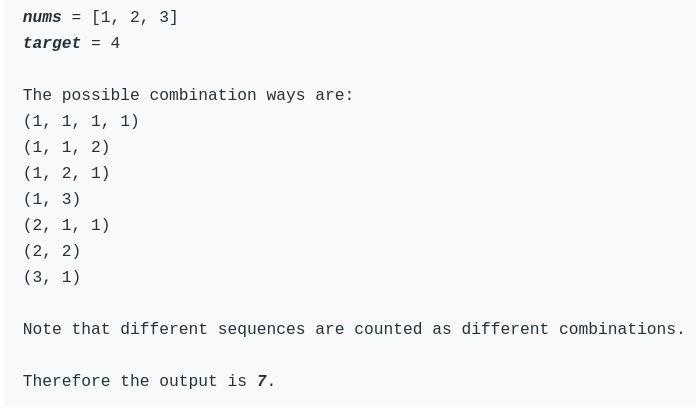

In [4]:
class Solution:
    def combinationSum4(self, nums, target: int) -> int:
        self.dp = {}
        return self.helper(nums, target)
        
    def helper(self, nums, target):
        if target == 0:
            return 1
        
        if target in self.dp:
            return self.dp[target]
        
        ans = 0
        for num in nums:
            if num <= target:
                ans += self.helper(nums, target-num)
        
        self.dp[target] = ans
        return ans

obj = Solution()
obj.combinationSum4([1,2,3,4], 5)
print(obj.dp)

{1: 1, 2: 2, 3: 4, 4: 8, 5: 15}


### Number of Ways to Generate Parantheses
For example, given n = 3, a solution set is:

        [
          "((()))",
          "(()())",
          "(())()",
          "()(())",
          "()()()"
        ]

In [10]:
class Solution:
    def num_ways(self, n):
        self.dp = {}
        return self.helper(0, 0, n)
        
    def helper(self, open_count, close_count, n):
        if close_count == n:
            return 1
        
        if (open_count, close_count) in self.dp:
            return self.dp[(open_count, close_count)]
        
        put_open = put_close = 0
        if open_count < n:
            put_open = self.helper(open_count+1, close_count, n)
        if open_count > close_count:
            put_close = self.helper(open_count, close_count+1, n)
        
        self.dp[(open_count, close_count)] = put_close + put_open
        return put_close + put_open

obj = Solution()
obj.num_ways(20) 

6564120420

### Minimum Cost For Tickets
In a country popular for train travel, you have planned some train travelling one year in advance.  The days of the year that you will travel is given as an array days.  Each day is an integer from 1 to 365.

Train tickets are sold in 3 different ways:

* a 1-day pass is sold for costs[0] dollars;
* a 7-day pass is sold for costs[1] dollars;
* a 30-day pass is sold for costs[2] dollars.

The passes allow that many days of consecutive travel.  For example, if we get a 7-day pass on day 2, then we can travel for 7 days: day 2, 3, 4, 5, 6, 7, and 8.

Return the minimum number of dollars you need to travel every day in the given list of days.

In [57]:
class Solution:
    def mincostTickets(self, days, costs) -> int:
        self.dp = {}
        last_day = max(days)
        days = set(days)
        return self.helper(0, last_day, days, costs)
    
    def helper(self, i, last_day, days, costs):
        if i>last_day:
            return 0
        
        if i in self.dp:
            return self.dp[i]
        
        if i not in days:
            return self.helper(i+1, last_day, days, costs)
            
        take_1 = costs[0] + self.helper(i+1, last_day, days, costs)
        take_7 = costs[1] + self.helper(i+7, last_day, days, costs)
        take_30 = costs[2] + self.helper(i+30, last_day, days, costs)
        self.dp[i]  = min(take_1, take_7, take_30)
        return self.dp[i]

obj = Solution()
days = [1,4,6,7,8,20]; costs = [2,7,15]
obj.mincostTickets(days, costs)

11

### Form Largest Integer With Digits That Add up to Target (Google onsite)

Given an array of integers cost and an integer target. Return the maximum integer you can paint under the following rules:

* The cost of painting a digit (i+1) is given by cost[i] (0 indexed).
* The total cost used must be equal to target.
* Integer does not have digits 0.

Since the answer may be too large, return it as string.

If there is no way to paint any integer given the condition, return "0".

In [2]:
class Solution:
    def largestNumber(self, cost, target: int) -> str:
        return self.helper(cost, target, {})
        
    def helper(self, cost, target, dp):
        if target == 0:
            return ''

        if target in dp:
            return dp[target]

        max_string = '0'
        for i in range(len(cost)):
            if cost[i] <= target:
                string = self.helper(cost, target - cost[i], dp)
                if string != '0':
                    string = str(i+1) + string
                    if int(string) > int(max_string):
                        max_string = string
                        
        dp[target] = max_string
        return max_string

Solution().largestNumber(cost = [4,3,2,5,6,7,2,5,5], target = 9)       

'7772'

### Target Sum
You are given a list of non-negative integers, a1, a2, ..., an, and a target, S. Now you have 2 symbols + and -. For each integer, you should choose one from + and - as its new symbol.

Find out how many ways to assign symbols to make sum of integers equal to target S.

In [9]:
class Solution:
    def findTargetSumWays(self, nums, S: int) -> int:
        self.dp = {}
        return self.helper(0, nums, S)
    
    def helper(self, i, nums, s):
        if i == len(nums):
            if s == 0:
                return 1
            return 0
        
        if (i,s) in self.dp:
            return self.dp[(i,s)]
        
        take_positive = self.helper(i+1, nums, s-nums[i])
        take_negative = self.helper(i+1, nums, s+nums[i])
        self.dp[(i,s)] = take_positive + take_negative
        return self.dp[(i,s)]

obj = Solution()
nums = [1,1,0]
s = 2
obj.findTargetSumWays(nums, s)

2